In [20]:
import numpy as np
import pandas as pd
from colorama import Back, Fore, Style
import time
from sklearn import metrics
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import manifold

In [57]:
# missing_value=['?']
data= pd.read_csv("BuddyMove.csv", na_values=missing_value)
print(data.isnull().sum())
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
X=data.iloc[:,1:]
colors = np.array(['g', 'r', 'b', 'c', 'k', 'y'])
# b : blue.
# g : green.
# r : red.
# c : cyan.
# m : magenta.
# y : yellow.
# k : black.
# w : white.


User Id      0
Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64
(249, 7)
(249, 7)


In [71]:
'''Clustering algorithm for
large-scale data
K-means
BIRCH
CLARA
CURE
DBSCAN'''

#### kmeans algorithm
from sklearn.cluster import KMeans
start = time.time()
kmean = KMeans(n_clusters=4, max_iter=500)
kmean.fit(X)
end = time.time()
print(Fore.BLUE + "k-mean algorithm time is :", end - start)
print(Fore.RESET)

labels = kmean.labels_
KMeans_Sil = metrics.silhouette_score(X, labels, metric='euclidean')
print(KMeans_Sil)
data['Kmeans_labels'] = kmean.labels_
# data

k-mean algorithm time is : 0.06196165084838867

0.34244277002455986


In [59]:
centroids = kmean.cluster_centers_
labels = kmean.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 2 2 2
 2 0 2 0 2 3 0 2 2 2 0 0 2 1 2 2 0 1 3 2 2 0 1 0 2 3 2 2 1 2 1 2 3 1 3 0 1
 3 0 0 0 0 2 2 1 2 0 3 2 3 2 3 0 0 3 2 0 3 2 0 2 0 0 2 3 0 2 0 3 0 2 2 3 0
 3 0 0 0 2 3 2 0 0 3 0 2 2 0 3 2 2 3 0 3 2 2 0 2 3 2 0 3 3 3 0 2 3 0 0 2 2
 2 2 3 0 2 3 2 2 2 3 2 0 2 0 3 1 2 2 3 0 0 0 2 0 2 2 2]


In [60]:
# cluster0 = data.iloc[labels==0, 3]
# print('cluster 0: \n', cluster0.value_counts())

# print('*' * 50)

# cluster1 = data.iloc[labels==1, 3]
# print('cluster 1: \n', cluster1.value_counts())

# print('*' * 50)

# cluster2 = data.iloc[labels==2, 3]
# print('cluster 2: \n', cluster2.value_counts())

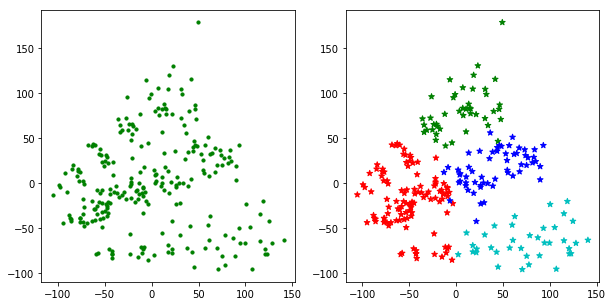

In [61]:
########## PCA of features for Kmeans
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
X_new = pca_model.fit_transform(X)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.scatter(X_new[:, 0], X_new[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_new[:, 0], X_new[:, 1], c=colors[kmean.labels_], marker='*')


Computing embedding
Done.


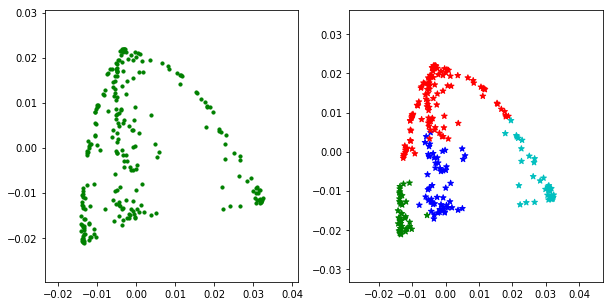

In [62]:

#----------------------------------------------------------------------
# 2D embedding of dataset
print("Computing embedding")
X_new = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.scatter(X_new[:, 0], X_new[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_new[:, 0], X_new[:, 1], c=colors[kmean.labels_], marker='*')

In [27]:
# labels = model.labels_

# cluster0 = data.iloc[labels==0, 3]
# print('cluster 0: \n', cluster0.value_counts())

# print('*' * 50)

# cluster1 = data.iloc[labels==1, 3]
# print('cluster 1: \n', cluster1.value_counts())

# print('*' * 50)


In [64]:

# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(121)
# ax.scatter(X_new[:, 0], X_new[:, 1], c='green', marker='o', s=10)
# ax = fig.add_subplot(122)
# ax.scatter(X_new[:, 0], X_new[:, 1], c=colors[model.labels_], marker='*')

# 1+1

In [67]:
########Silhouette Coefficient
from sklearn import metrics
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_

KMeans_Sil = metrics.silhouette_score(X, labels, metric='euclidean')
print(KMeans_Sil)



0.3492187864800945


In [30]:



linkage = "single"
n_clusters = 4
model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters).fit(X)
labels = model.labels_

Agglo_Sil = metrics.silhouette_score(X, labels, metric='euclidean')
print(Agglo_Sil)







################Visualisation for Agglomerative Clustering

n_samples, n_features = X_edit.shape


digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

# np.random.seed(0)
# def nudge_images(X, y):
#     # Having a larger dataset shows more clearly the behavior of the
#     # methods, but we multiply the size of the dataset only by 2, as the
#     # cost of the hierarchical clustering methods are strongly
#     # super-linear in n_samples
#     shift = lambda x: ndimage.shift(x.reshape((8, 8)),
#                                   .3 * np.random.normal(size=2),
#                                   mode='constant',
#                                   ).ravel()
#     X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
#     Y = np.concatenate([y, y], axis=0)
#     return X, Y
#
#
# X_edit, y = nudge_images(X_edit, y)



#----------------------------------------------------------------------
###### Visualize the clustering

def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


-0.028251777214029824


NameError: name 'X_edit' is not defined

In [ ]:
plot_clustering(X_red,labels)

In [ ]:
X_red

In [32]:

#----------------------------------------------------------------------
# 2D embedding of dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")


labels = []
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=6)
    t0 = time()
    clustering.fit(X)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    labels = clustering.labels_
    Agglo_Sil = metrics.silhouette_score(X, labels, metric='euclidean')
    print(Agglo_Sil)

plt.show()


1+1

Computing embedding
Done.


TypeError: 'module' object is not callable